In [1]:
!pip install -U natasha
!pip install ipymarkup

In [2]:
import re

In [3]:
from natasha import (
    Segmenter,
    MorphVocab,
    NamesExtractor,
    DatesExtractor,
    MoneyExtractor,
    AddrExtractor,
    Doc,
    PER,
    Segmenter,
    NewsEmbedding,
    NewsMorphTagger,
    NewsSyntaxParser,
    NewsNERTagger,
)

In [4]:
from razdel import tokenize

In [5]:
sents = ['Посол Израиля на Украине Йоэль Лион признался, что пришел в шок, узнав о решении властей Львовской области объявить 2019 год годом лидера запрещенной в России Организации украинских националистов (ОУН) Степана Бандеры.',
 'Свое заявление он разместил в Twitter.',
 '«Я не могу понять, как прославление тех, кто непосредственно принимал участие в ужасных антисемитских преступлениях, помогает бороться с антисемитизмом и ксенофобией.',
 'Украина не должна забывать о преступлениях, совершенных против украинских евреев, и никоим образом не отмечать их через почитание их исполнителей», — написал дипломат.',
 '11 декабря Львовский областной совет принял решение провозгласить 2019 год в регионе годом Степана Бандеры в связи с празднованием 110-летия со дня рождения лидера ОУН (Бандера родился 1 января 1909 года).',
 'В июле аналогичное решение принял Житомирский областной совет.',
 'В начале месяца с предложением к президенту страны Петру Порошенко вернуть Бандере звание Героя Украины обратились депутаты Верховной Рады.',
 'Парламентарии уверены, что признание Бандеры национальным героем поможет в борьбе с подрывной деятельностью против Украины в информационном поле, а также остановит «распространение мифов, созданных российской пропагандой».',
 'Степан Бандера (1909-1959) был одним из лидеров Организации украинских националистов, выступающей за создание независимого государства на территориях с украиноязычным населением.',
 'В 2010 году в период президентства Виктора Ющенко Бандера был посмертно признан Героем Украины, однако впоследствии это решение было отменено судом.']

In [145]:
def razdel_tokenizer(text):
    return [item.text for item in list(tokenize(text))]
tokens = [razdel_tokenizer(item) for item in sents]

In [146]:
print(tokens)

[['Посол', 'Израиля', 'на', 'Украине', 'Йоэль', 'Лион', 'признался', ',', 'что', 'пришел', 'в', 'шок', ',', 'узнав', 'о', 'решении', 'властей', 'Львовской', 'области', 'объявить', '2019', 'год', 'годом', 'лидера', 'запрещенной', 'в', 'России', 'Организации', 'украинских', 'националистов', '(', 'ОУН', ')', 'Степана', 'Бандеры', '.'], ['Свое', 'заявление', 'он', 'разместил', 'в', 'Twitter', '.'], ['«', 'Я', 'не', 'могу', 'понять', ',', 'как', 'прославление', 'тех', ',', 'кто', 'непосредственно', 'принимал', 'участие', 'в', 'ужасных', 'антисемитских', 'преступлениях', ',', 'помогает', 'бороться', 'с', 'антисемитизмом', 'и', 'ксенофобией', '.'], ['Украина', 'не', 'должна', 'забывать', 'о', 'преступлениях', ',', 'совершенных', 'против', 'украинских', 'евреев', ',', 'и', 'никоим', 'образом', 'не', 'отмечать', 'их', 'через', 'почитание', 'их', 'исполнителей', '»', ',', '—', 'написал', 'дипломат', '.'], ['11', 'декабря', 'Львовский', 'областной', 'совет', 'принял', 'решение', 'провозгласить', 

In [147]:
mv = MorphVocab()

In [148]:
ne = NamesExtractor(mv)
ae = AddrExtractor(mv)

In [149]:
segmenter = Segmenter()
morph_vocab = MorphVocab()

In [150]:
emb = NewsEmbedding()
morph_tagger = NewsMorphTagger(emb)
syntax_parser = NewsSyntaxParser(emb)
ner_tagger = NewsNERTagger(emb)

In [151]:
names_extractor = NamesExtractor(morph_vocab)

In [152]:
docs = []

for text in sents:
    doc = Doc(text)
    doc.segment(segmenter)
    doc.tag_morph(morph_tagger)
    doc.tag_ner(ner_tagger)
    docs.append(doc)
    for item in doc.spans:
        if item.type == "PER":
            aen.append(item.text)
        elif item.type == "LOC":
            lon.append(item.text)

Что было до:

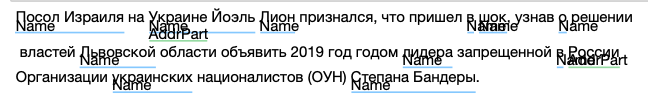

После:

In [153]:
txt = docs[0]
txt.ner.print()

Посол Израиля на Украине Йоэль Лион признался, что пришел в шок, узнав
      LOC────    LOC──── PER───────                                   
 о решении властей Львовской области объявить 2019 год годом лидера 
                   LOC──────────────                                
запрещенной в России Организации украинских националистов (ОУН) 
              LOC─── ORG─────────────────────────────────────── 
Степана Бандеры.
PER──────────── 


# Оценка сложности

O(n2) — квадратичная сложность, потому что проходится по всем предложениям в массиве sents, а потом по всем сущностям в spans. 

# Как ускорить?

Надо избавиться от вложенного цикла.
Можно доки занести в отдельный массив и потом пройтись по докам в отдельном цикле. 

Тогда сложность будет o(n). 